# Assignment 1: Streetview

### Instructions (remove before submission):
* Answer the questions in this notebook, including the code, results, and explanations. It is not required to RUN everything in the notebook. You can run the experiments in separate Python scripts and include the results as images, as long as they match the code and explanations.
* Submit both this notebook and a PDF through Canvas. To create the PDF, see File > Export Notebook as PDFs. Submit only one notebook and one PDF per team.
* Keep the PDF below 20 pages. Remove these instructions and the general advise below in the final PDF.
* Add a clear explanation of your approach and an in-depth interpretation of your results for every subquestion. Use markdown cells for this.
* Avoid all unnecessary outputs. Only output the answers to the questions. Add ';' behind lines that generate output to suppress unnecessary output.
* Add the names of all team members below.

### General advice (remove before submission):
* All tasks can be completed with scikit-learn. You are allowed (but not required) to use Keras as well.  
* Training models can take time. Make sure to start computations well in advance of the deadline. 
* Be efficient. Don't try every model on all the data at once. Test your code on a small part of the data (even just 1%) until you are sure that there are no more bugs or other issues.
* Observe how long it takes to train different models on a small part of your data and learn from this which ones are feasible to build on the full dataset.
* It should *in principle* be possible to reproduce all results via 'run all'. However, that may take to long to be practical. You are also allowed to run code elsewhere and paste in the code and results. Feel free to use any compute resources at your disposal. 
* On [Google Colab](https://colab.research.google.com/) you can set up a notebook in the cloud. The notebook contains a cell to load the necessary libraries on colab. You need to uncomment and run it on Colab. You will also likely get asked to switch to a high-RAM environment to train models on this dataset.

### Team details
Add the names of all team members, as well as a short description of each member's contributions to this assignment.

TEAM MEMBER 1 = ...   
TEAM MEMBER 2 = ...  
TEAM MEMBER 3 = ...   
TEAM MEMBER 4 = ...  
TEAM MEMBER 5 = ...   
TEAM MEMBER 6 = ...    

In [1]:
# General imports (for running locally)
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures

In [ ]:
# General imports for running in Google Colab (uncomment the following lines)
#%matplotlib inline
#!pip install openml
#import openml as oml
#import numpy as np
#import matplotlib.pyplot as plt
#import sklearn

In [6]:
# Download Streetview data. Takes a while the first time.
SVHN = oml.datasets.get_dataset(41081)
X, y, cats, attrs = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

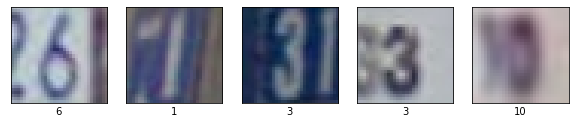

In [93]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n].reshape(32, 32)/255, cmap='gray')
        else:
            axes[n].imshow(X[n].reshape(32, 32, 3)/255)
        axes[n].set_xlabel((y[n]+1)) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,99289) for i in range(5)]
X_random = [X[i] for i in images]
y_random = [y[i] for i in images]
plot_images(X_random, y_random)

## 1. Evaluate different models (15 points)
- Take a stratified 10% subsample of the data. Plot the distribution of the classes (e.g. as a histogram) for both the original data and the subsample. 
- Evaluate k-Nearest Neighbors, Logistic Regression and Linear SVM on this sample, using their default hyperparameter settings. 
    - Use cross-validation with 3 folds, output the training accuracy and test accuracy including the standard deviations.
- Discuss the results. Are they what you expected? Are the model over/underfitting? What does the standard deviation tell you? Do you think you can get better results with more training data?

## 2. Learning curves (20 points)
- Start with a 1% stratified subsample of the original data. Train all 3 classifiers and record both the accuracy (same as above) and the [training time](https://pythonhow.com/measure-execution-time-python-code/).  
- Repeatedly **add** 1% more statified data (don't take a completely new 2% subsample). Measure accuracy and training time again.
- Continue to at least 10% of the original data. Plot the results as a line graph, training set size vs accuracy and training time, respectively.
    - If the algorithms are sufficiently fast, you can continue to 100% as well.
- Discuss your results. Which algorithms are fast/slow? Which require more data to get better results? Which ones tend to overfit? Which ones would benefit from more data?

## 3. Data representation (20 points)
* Convert the images to grayscale (use the function below). Check whether the conversion is correct by plotting the converted images.
    * Is the grayscale representation better than the color representation? Does it yield better models? Why (not)? Run the necessary experiments and discuss.
* Afterwards, normalize the data by substracting the mean from every image and dividing by the standard deviation of very image. 
    * Note: Do this 'elementwise' for every image independently. Don't compute means or standard deviations over the entire training/test set
    * Again, check whether you have done it correctly by plotting the converted images.
    * Is the new representation better? Why (not)? Run the necessary experiments and discuss.
* Finally, run [PCA (Principal Component Analysis)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the data and see if that gives you a better (lower-dimensional) representation. Note that you need to use a pipeline here to avoid data leakage between your training and test set (see Tutorial 3).
    * Try different numbers of components or use a solver to guess the optimal number of components
    * Is the new representation better? Why (not)? Run the necessary experiments and discuss.

In [98]:
# Converts an RGB encoded image to a grayscale image
def rgb2gray(X, dim=32):
    return np.expand_dims(np.dot(X.reshape(len(X), dim*dim, 3), [0.2990, 0.5870, 0.1140]), axis=3)
X_gray = rgb2gray(X)

## 4. Regularization (20 points)
- Tune the algorithm's main regularization hyperparameter on the 10% stratified subsample using the normalized grayscale representation. The misclassification cost in SVMs (C), the regularization parameter in logistic regression (C), and the number of neighbors (n_neighbors) in kNN. 
- We expect the optimum for the C parameters to lie in $[10^{-12},10^{12}] and for n_neighbors between 1 and 50. C should be varied logarithmically, n_neighbors linearly. 
- Run a grid search over these ranges, using 3-fold cross-valdation, and plot both the training and test error. Start with a coarse grid (e.g. 5 values per hyperparameter), use a finer grid for the 'interesting' regions (where performance changes) if training time allows.
- Plot the effect of every one of the hyperparameters (both the training and test score). Discuss the plots. For which values is the model over/underfitting? Is there a sweet spot?
- Evaluate the optimized models (the best hyperparameter settings) on the rest of the (unseen) data and discuss your findings. Do the results generalize? If not, what can/ should you do? Discuss. Run additional experiments if it helps you confirm your claims.

## 5. Interpreting misclassifications (10 point)
- Chances are that your best model is not 100% accurate. Plot a few of the misclassified examples and their predicted and correct labels. Discuss. Are these indeed 'hard' examples that are easy to get wrong?
- Plot the confusion matrix. Which digits are often confused with each other? Which digits are easier/harder to classify? Discuss.

## 6. Interpreting models (15 points)
- Try to understand what the linear models have learned by looking at their model parameters. Are there features (pixels) that are more important than others? What does that tell you?
- Visualize the model parameters of the best (tuned) models as a 32x32 matrix, for each class individually. Does this help you understand what the model is paying attention to?
- Do the same for an underfitted and an overfitted version of logistic regression. What changes? Is the model paying attention to different parts of the image now?

Good luck!